In [ ]:
!pip install mne
import mne


In [ ]:
raw=mne.io.read_raw_fif('/content/drive/MyDrive/Copy of oddball_example_small-fif (1).gz', preload = True)

Opening raw data file /content/drive/MyDrive/Copy of oddball_example_small-fif (1).gz...


<ipython-input-95-27b65ca50835>:1: RuntimeWarning: This filename (/content/drive/MyDrive/Copy of oddball_example_small-fif (1).gz) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw=mne.io.read_raw_fif('/content/drive/MyDrive/Copy of oddball_example_small-fif (1).gz', preload = True)


Isotrak not found
    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.
Reading 0 ... 109097  =      0.000 ...  1090.970 secs...


In [ ]:
raw.filter(1,20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 331 samples (3.310 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


<Raw | Copy of oddball_example_small-fif (1).gz, 64 x 109098 (1091.0 s), ~53.3 MB, data loaded>

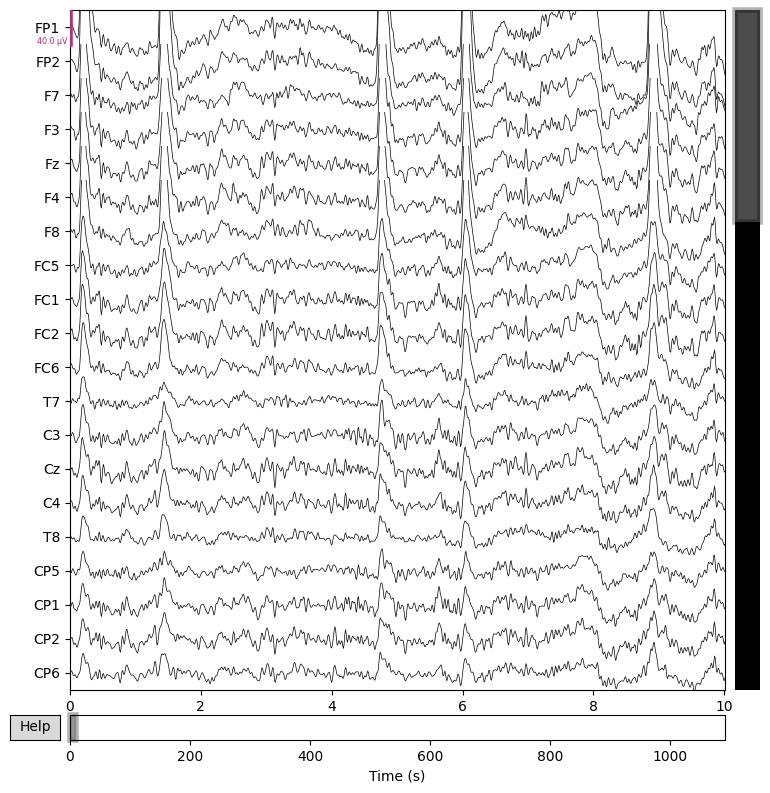

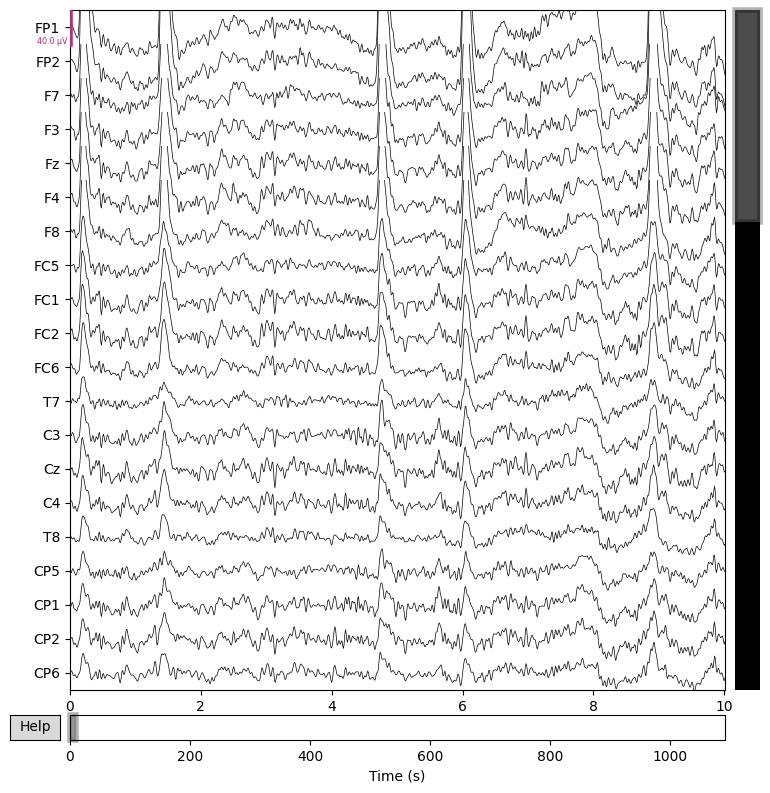

In [ ]:
raw.plot()

In [ ]:
ica=mne.preprocessing.ICA(n_components=20, random_state=0)


In [ ]:
ica.fit(raw.copy().filter(8,35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 165 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 25.7s.


<ICA | raw data decomposition, method: fastica (fit in 72 iterations on 109098 samples), 20 ICA components (63 PCA components available), channel types: eeg, no sources marked for exclusion>

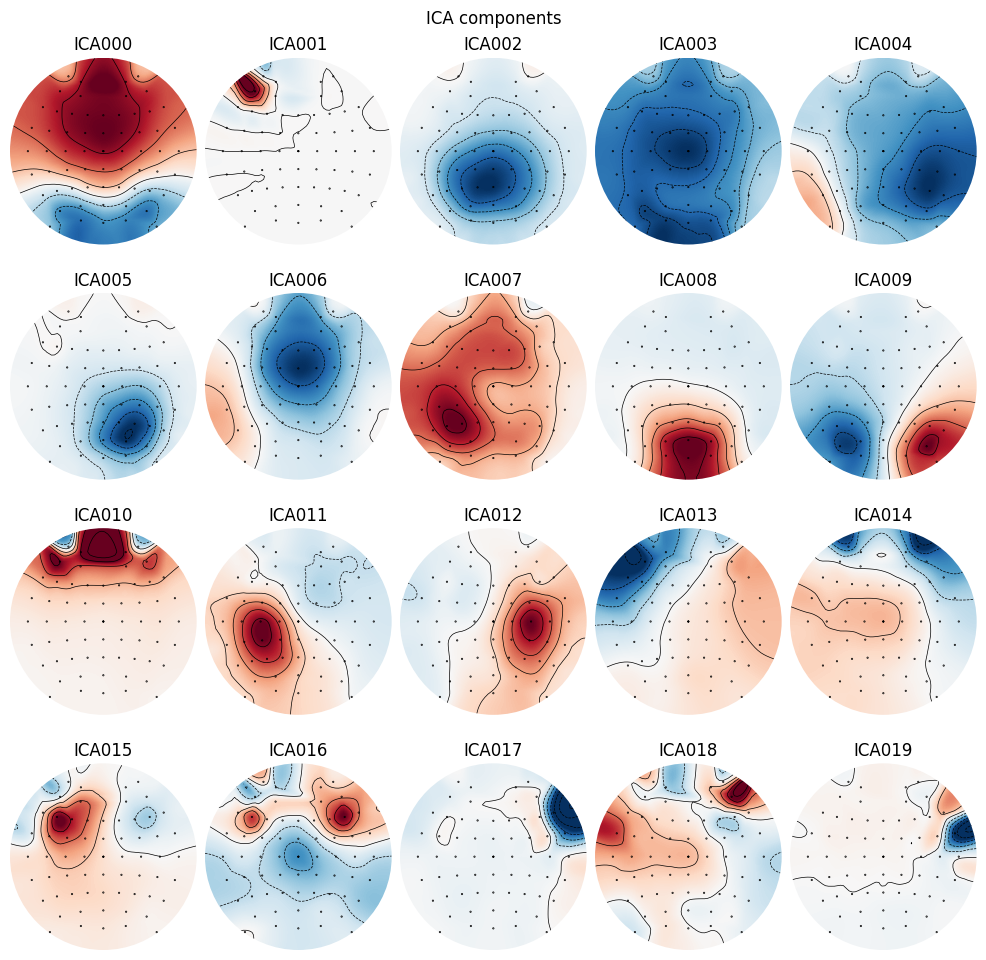

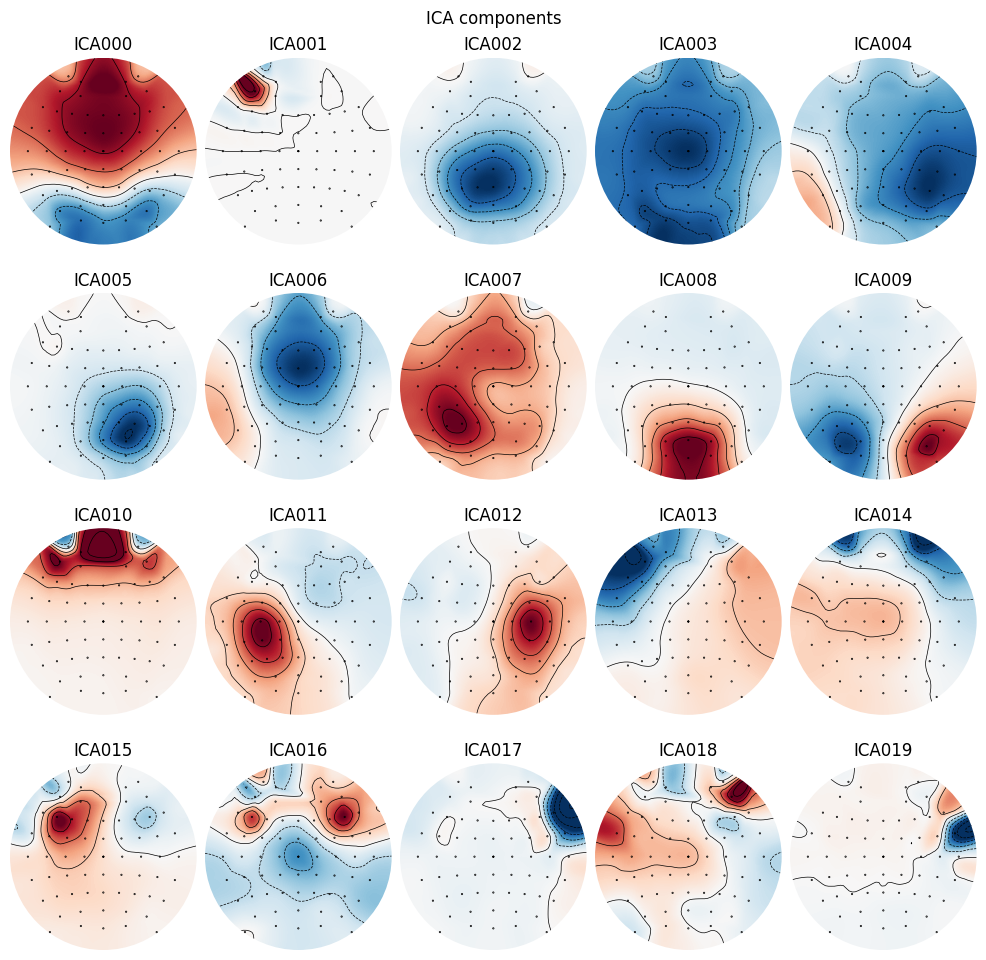

In [ ]:
ica.plot_components()

In [ ]:
events=mne.find_events(raw)

903 events found on stim channel STI 014
Event IDs: [100 200]


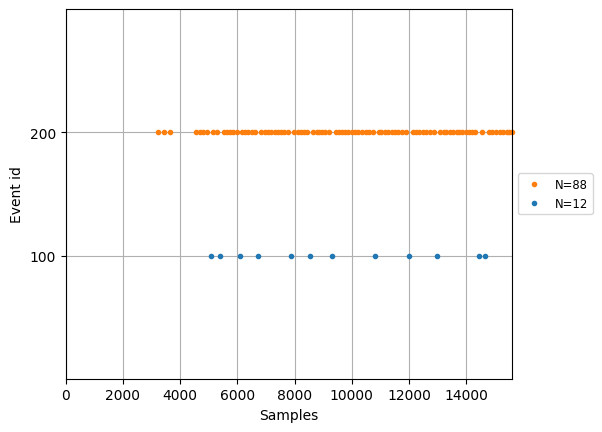

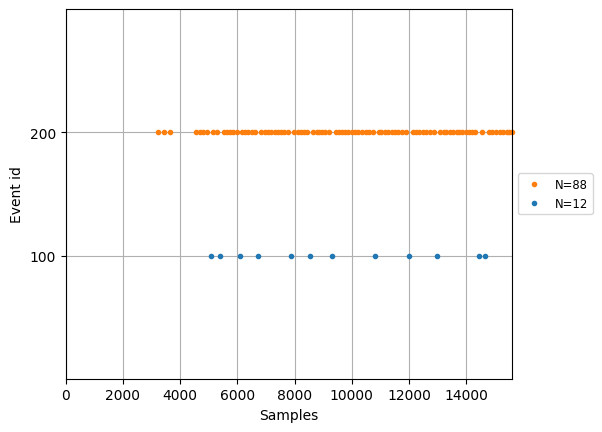

In [ ]:
mne.viz.plot_events(events[:100])

In [ ]:
print(raw.ch_names)


['FP1', 'FP2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10', 'AF7', 'AF3', 'AF4', 'AF8', 'F5', 'F1', 'F2', 'F6', 'SO1', 'FT7', 'FC3', 'FC4', 'FT8', 'SO2', 'C5', 'C1', 'C2', 'C6', 'TP7', 'CP3', 'CPz', 'CP4', 'TP8', 'P5', 'P1', 'P2', 'P6', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'STI 014', 'FCz']


In [ ]:
bad_idx, scores=ica.find_bads_eog(raw, "SO2", threshold=1.5)

Using EOG channel: SO2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1000 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


In [ ]:
ica.exclude=bad_idx

In [ ]:
raw1=ica.apply(raw.copy(),exclude=ica.exclude)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 5 ICA components
    Projecting back using 63 PCA components


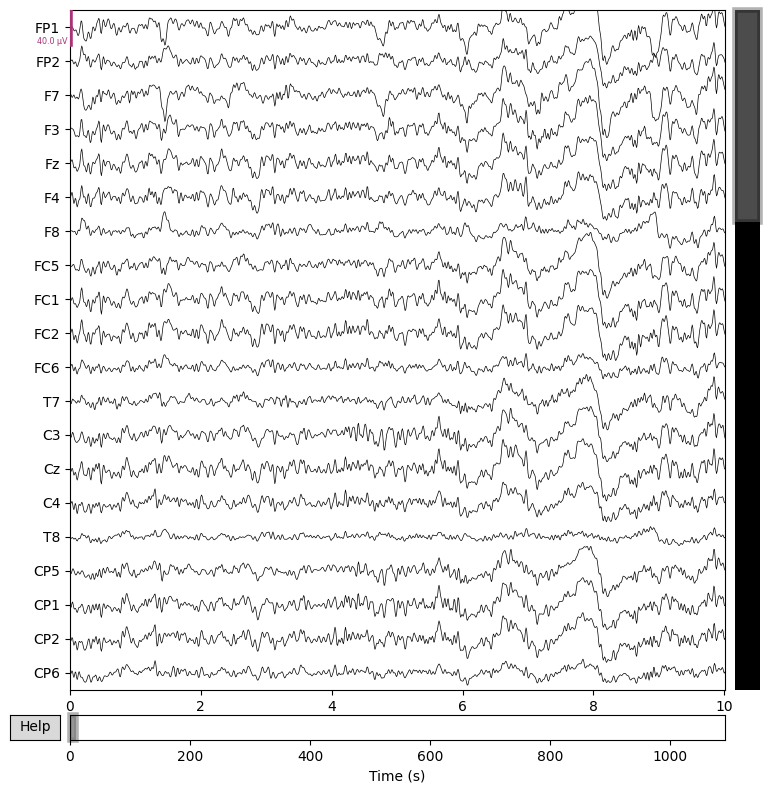

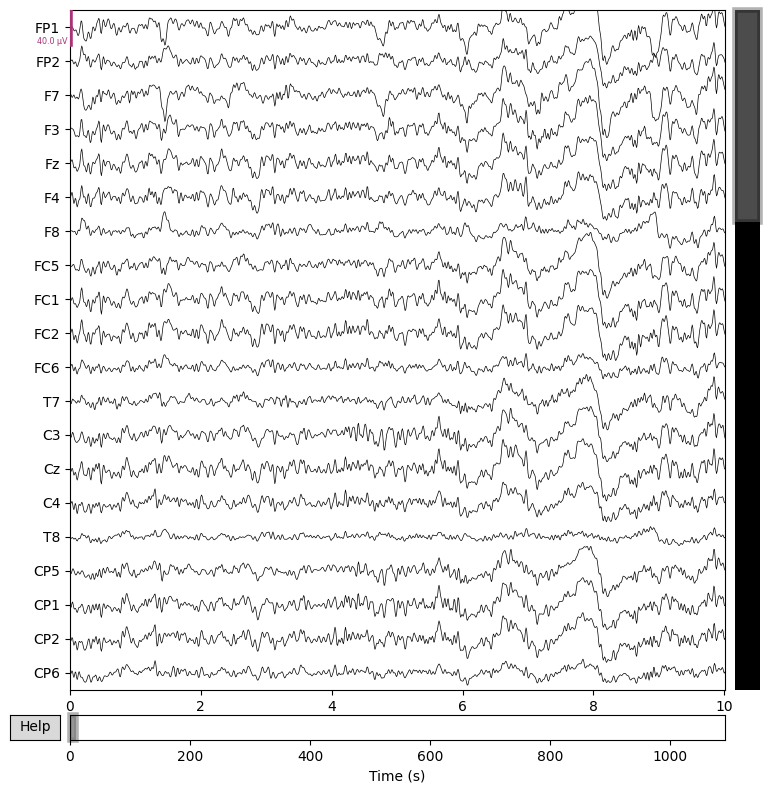

In [ ]:
raw1.plot()

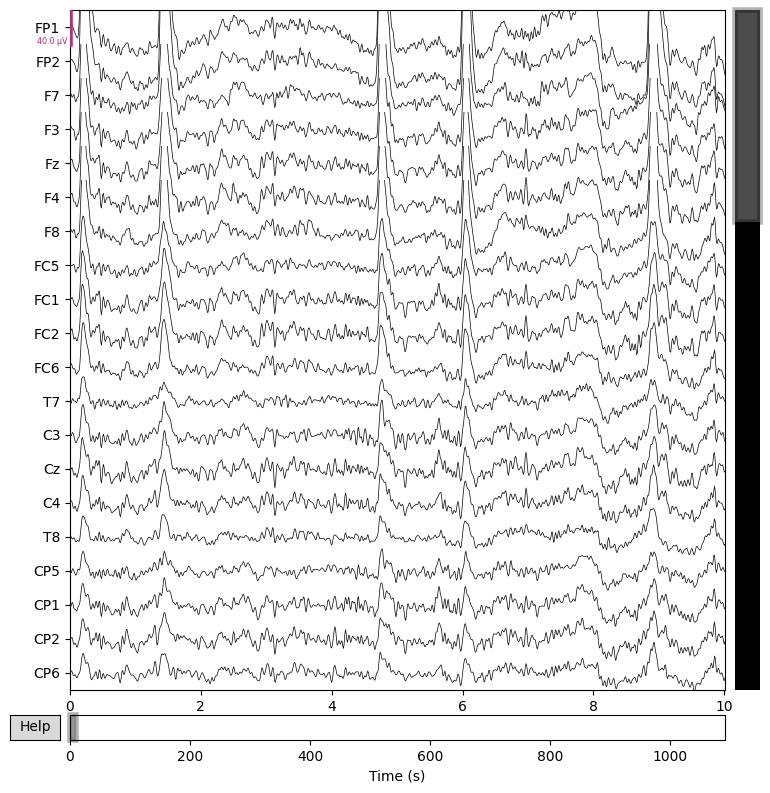

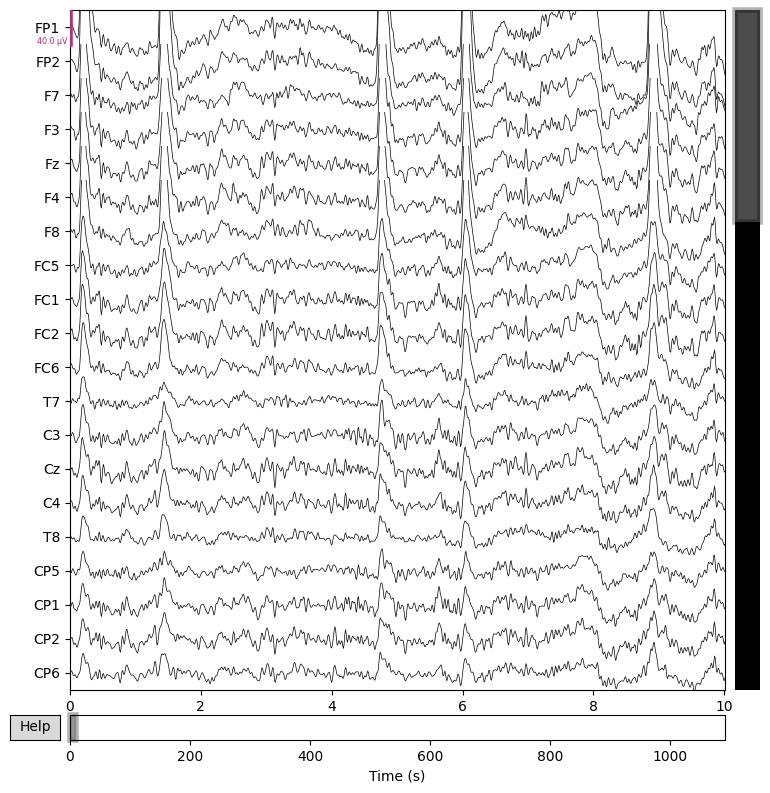

In [ ]:
raw.plot()

In [ ]:
event_ids={"standard/stimulus": 200, "target/stimulus": 100}

In [ ]:
epochs=mne.Epochs(raw, events, preload= True, event_id= event_ids)

Not setting metadata
903 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 903 events and 71 original time points ...
0 bad epochs dropped


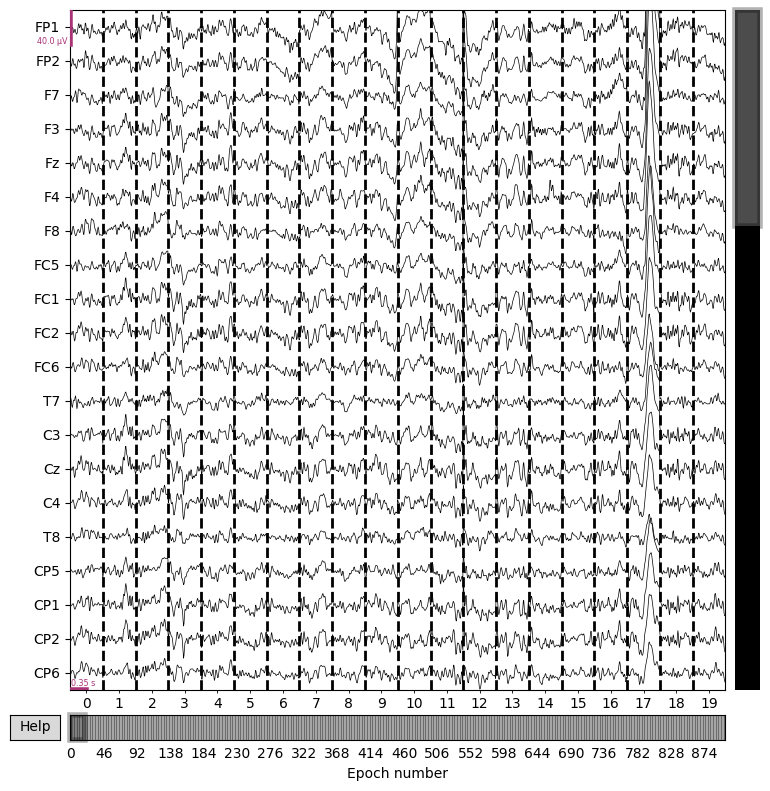

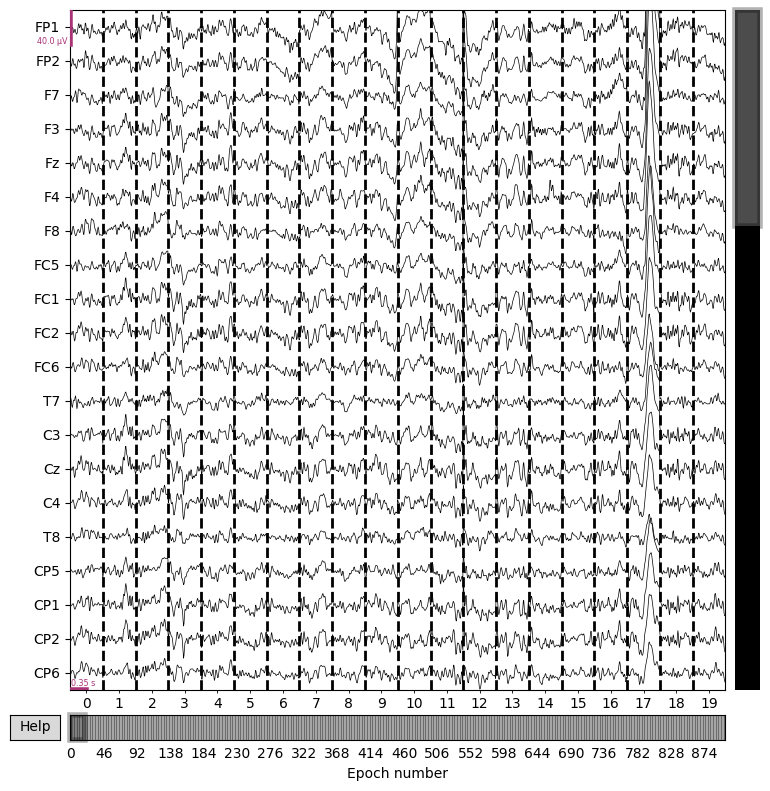

In [ ]:
epochs.plot()

In [ ]:
epochs=ica.apply(epochs, exclude=ica.exclude)

Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 5 ICA components
    Projecting back using 63 PCA components


<ipython-input-112-b079bf12f89c>:1: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs=ica.apply(epochs, exclude=ica.exclude)


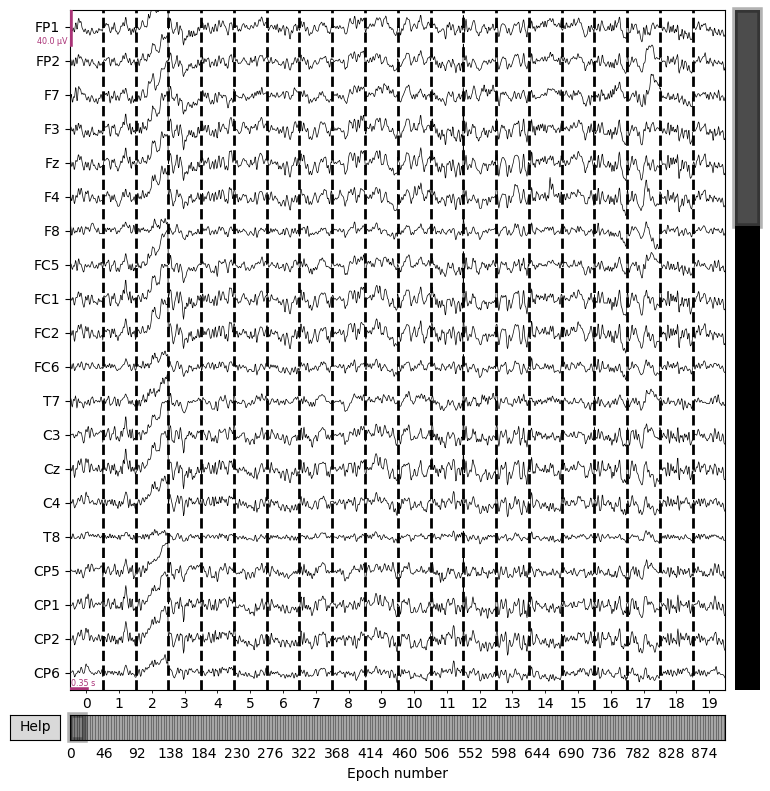

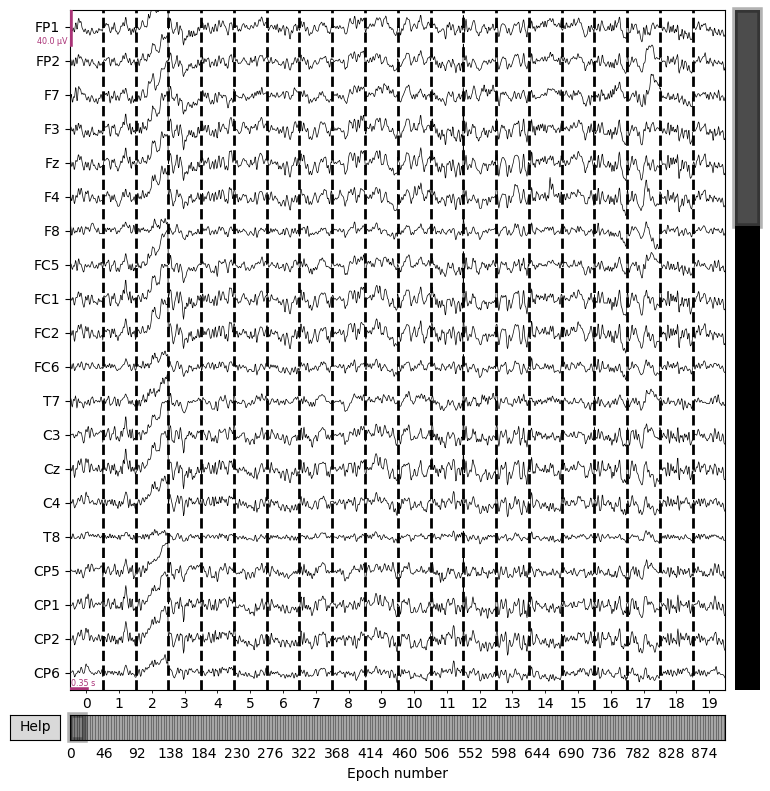

In [ ]:
epochs.plot()

In [ ]:
epochs.equalize_event_counts(event_ids)
epochs

Dropped 691 epochs: 0, 1, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188, 193, 194, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 248, 249, 252, 253, 254, 257, 260, 261, 262, 263, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280,

<Epochs |  212 events (all good), -0.2 – 0.5 s, baseline -0.2 – 0 s, ~7.4 MB, data loaded,
 'standard/stimulus': 106
 'target/stimulus': 106>

In [ ]:
epochs_for_tfr=mne.Epochs(raw, events, event_id= event_ids, tmin=-.5, tmax= 1.5, preload= True)

Not setting metadata
903 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 903 events and 201 original time points ...
0 bad epochs dropped


In [ ]:
epochs_for_tfr=ica.apply(epochs, exclude= ica.exclude)

Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 5 ICA components
    Projecting back using 63 PCA components


<ipython-input-117-ed36c35c0351>:1: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs_for_tfr=ica.apply(epochs, exclude= ica.exclude)


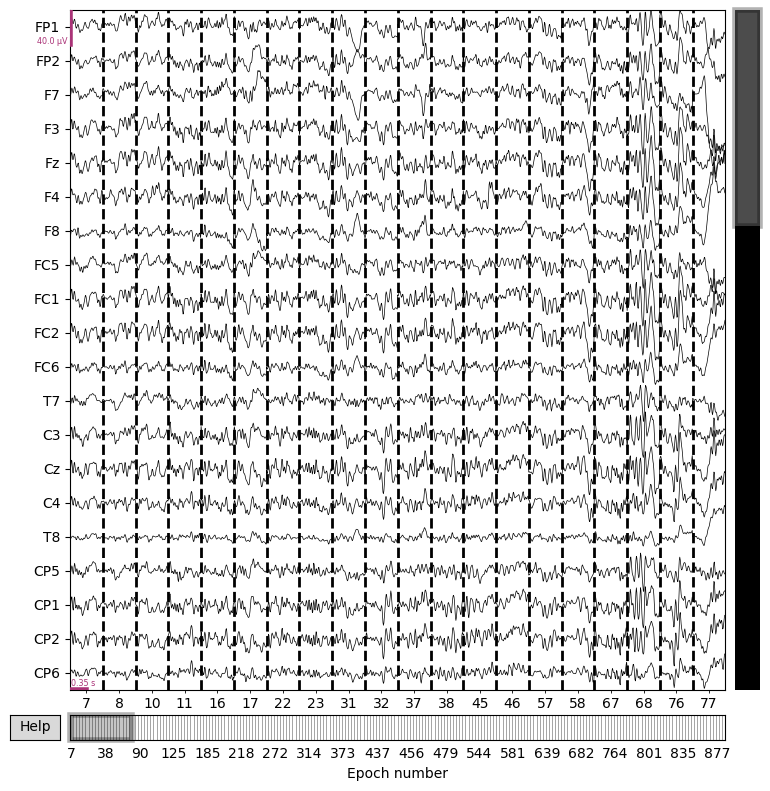

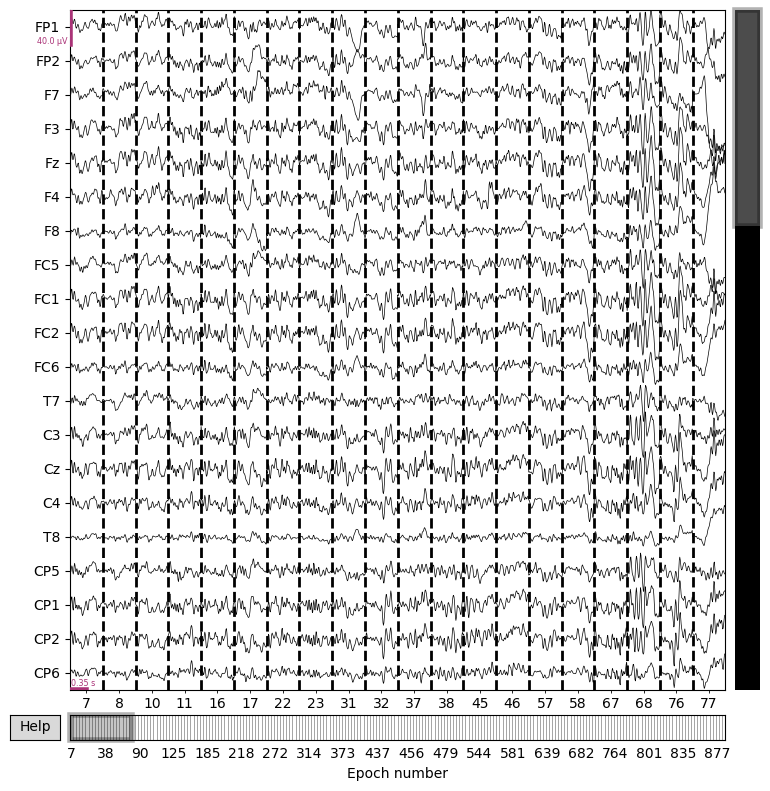

In [ ]:
epochs_for_tfr.plot()

In [ ]:
epochs_for_tfr.equalize_event_counts(event_ids)

Dropped 0 epochs: 


(<Epochs |  212 events (all good), -0.2 – 0.5 s, baseline -0.2 – 0 s, ~7.4 MB, data loaded,
  'standard/stimulus': 106
  'target/stimulus': 106>,
 array([], dtype=int64))

# **Evoked**
> **Why .average() method is used?**</br>

*   This method computes the average of the selected epochs.
*   Averaging across epochs is a way to enhance the signal-to-noise ratio (SNR) by reducing random noise and emphasizing consistent signal patterns.
The result is an Evoked object, which represents the average event-related potential (ERP) or event-related field (ERF) for the specified condition.
*   Averaging reduces the amount of data by collapsing multiple epochs into a single averaged epoch. This makes subsequent analysis more manageable and computationally efficient.



## **EDA**

In [ ]:
target=epochs["target"].average()
standard=epochs["standard"].average()

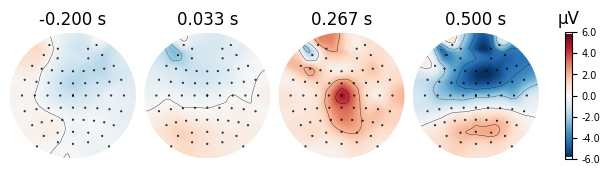

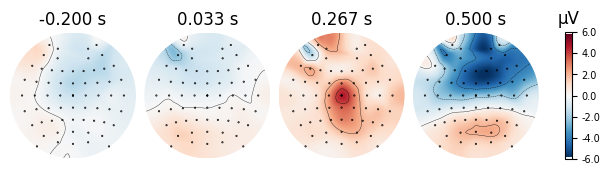

In [ ]:
target.plot_topomap()

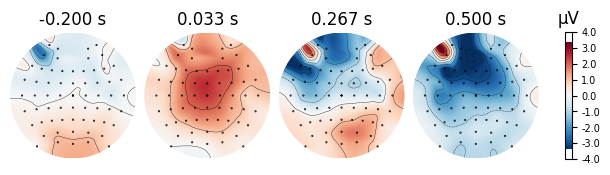

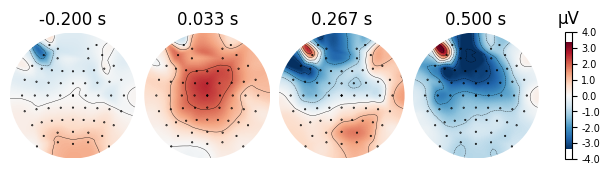

In [ ]:
standard.plot_topomap()

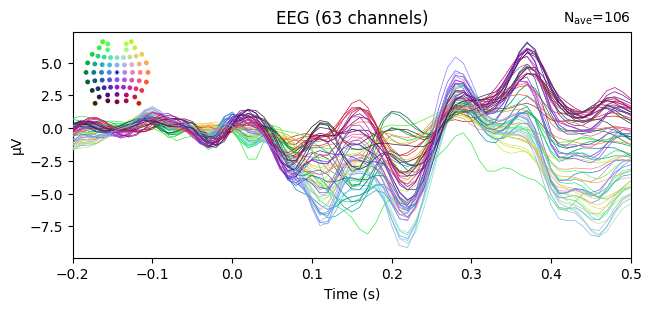

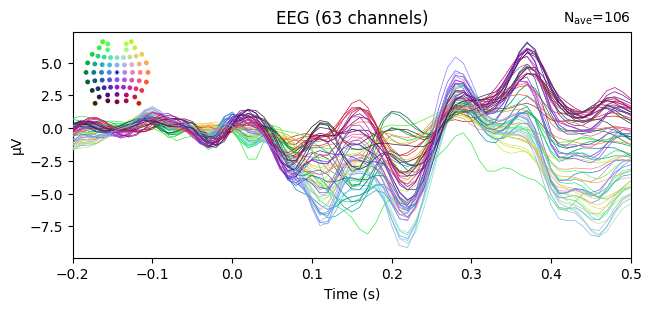

In [ ]:
target.plot()

No projector specified for this dataset. Please consider the method self.add_proj.


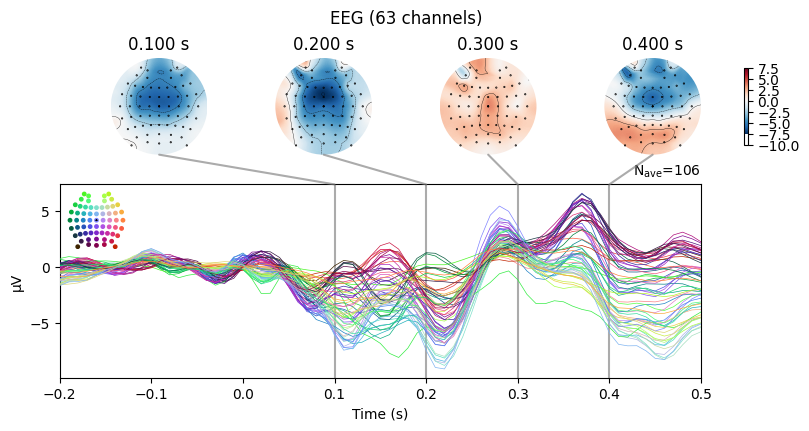

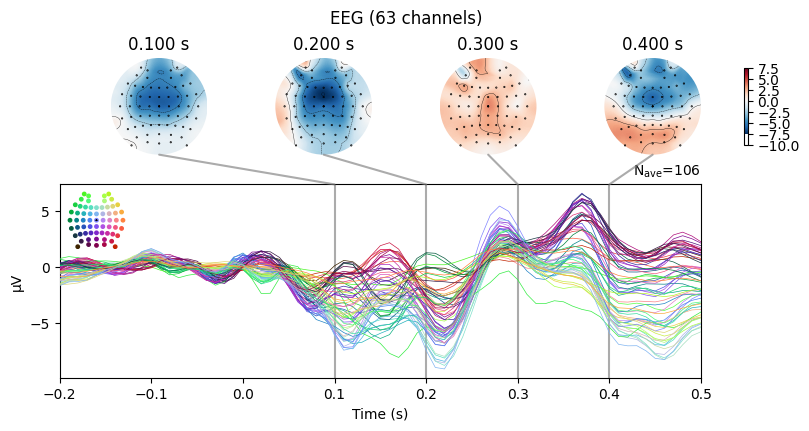

In [ ]:
target.plot_joint(times=[.1,.2,.3,.4])

In [ ]:
diff=mne.combine_evoked((target, standard), weights= 'equal')

No projector specified for this dataset. Please consider the method self.add_proj.


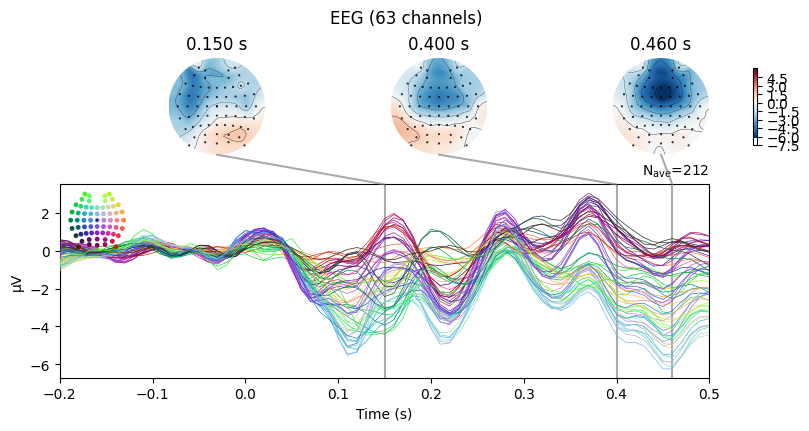

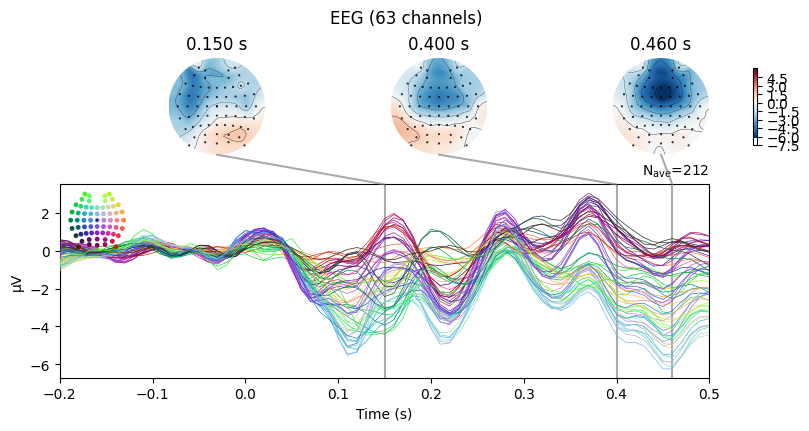

In [ ]:
diff.plot_joint()

In [ ]:
rois= mne.channels.make_1020_channel_selections(diff.info, midline="z12")

[<Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 2 Axes>]

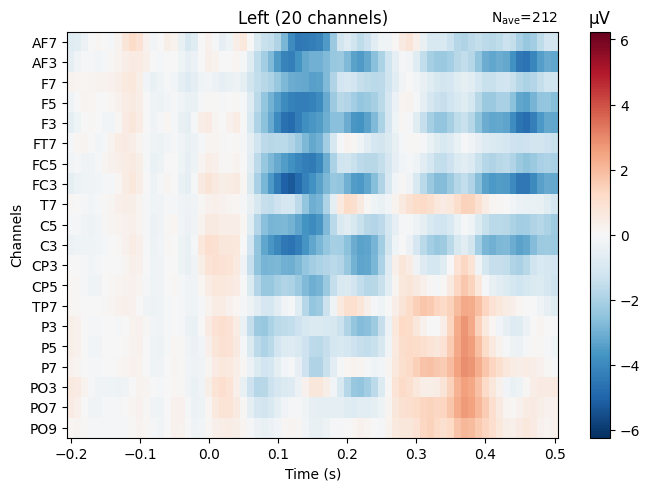

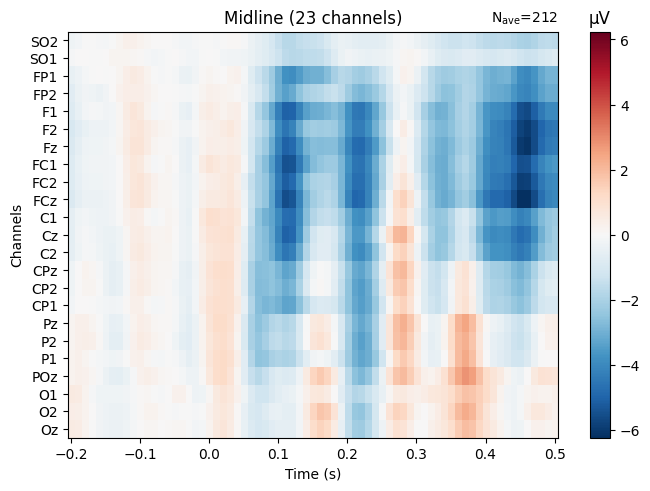

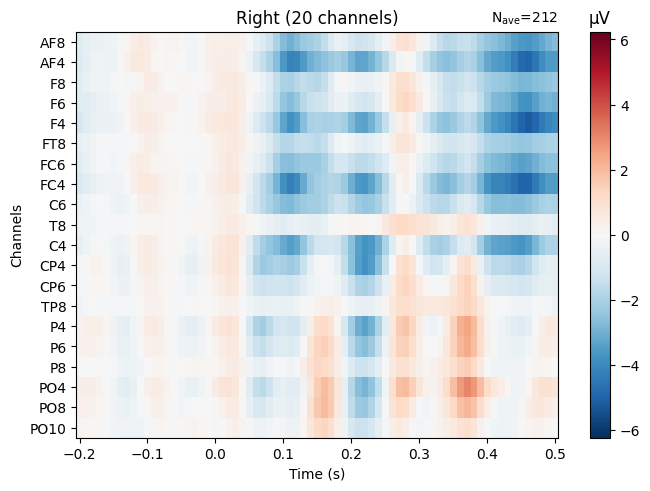

In [ ]:
diff.plot_image(group_by= rois, show= False, show_names= "all")

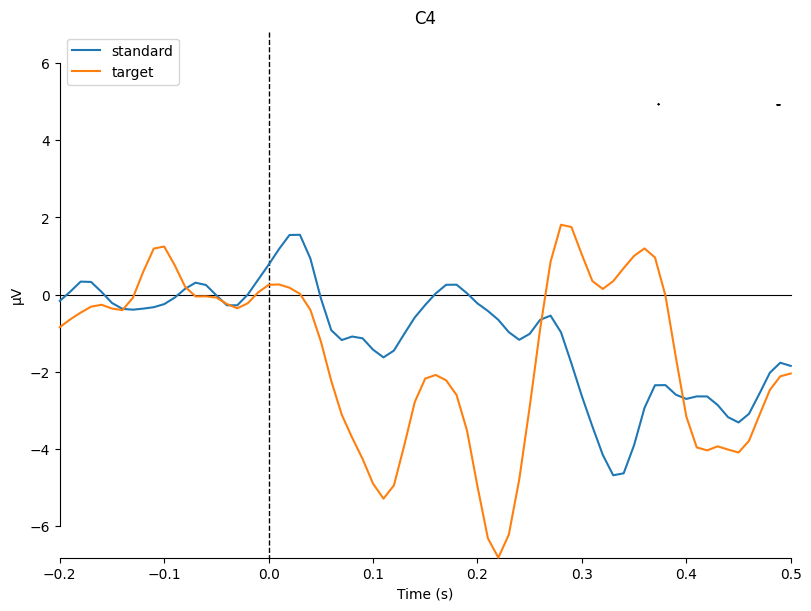

[<Figure size 800x600 with 2 Axes>]

In [ ]:
mne.viz.plot_compare_evokeds({"standard": standard, "target": target}, picks=[14])#negetive time indicates the time before the occurence of a particular event

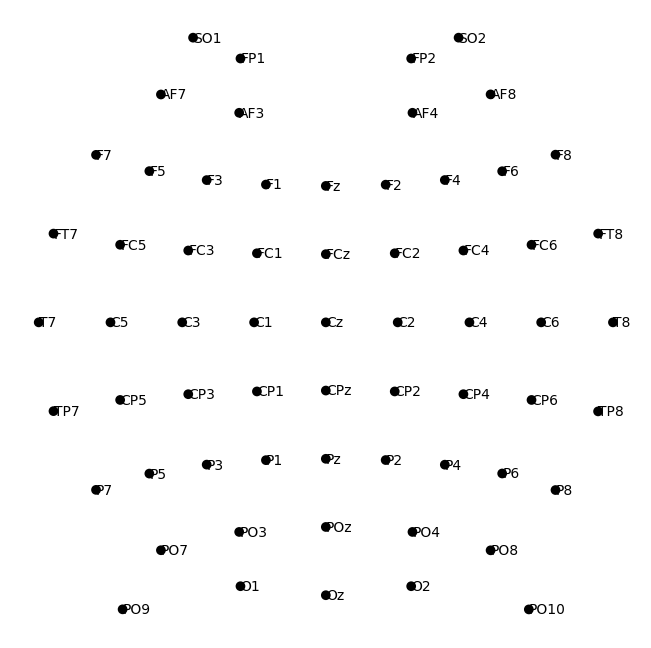

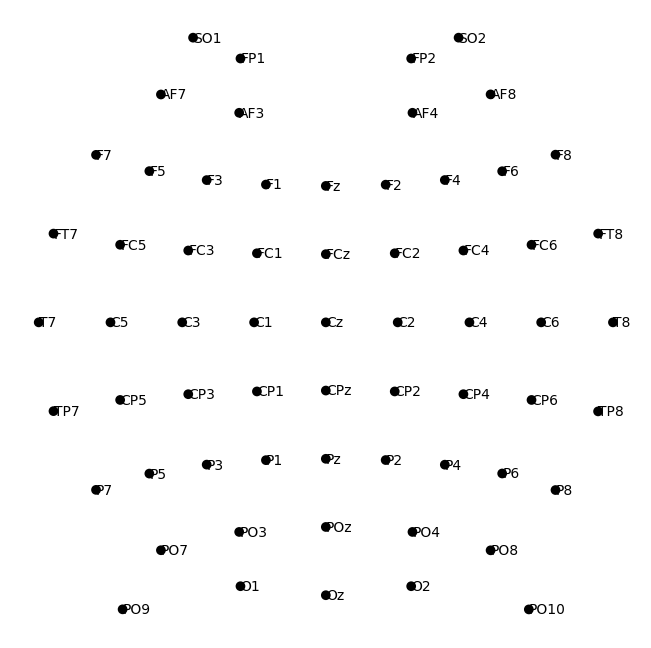

In [ ]:
target.plot_sensors(show_names= True)

## **TIME FREQUENCY ANALYSIS**

In [ ]:
reject= dict(grad=4000e-13, mag=4e-12, eog=200e-6)

In [ ]:
events = mne.find_events(raw, stim_channel= 'STI 014')
event_id={"auditory/left":1}
tmin, tmax= -.2, .5

baseline=(None,0)
picks= mne.pick_types(raw.info, meg=True, eeg=True,eog=True, stim=False, exclude='bads')
epochs= mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks, baseline=baseline, reject=True, preload=True)

903 events found on stim channel STI 014
Event IDs: [100 200]


ValueError: No matching events found for auditory/left (event id 1)

In [ ]:
from mne.time_frequency import tfr_morlet
freqs = list(range(3, 30))
n_cycles = 2  # Reduce the number of cycles

# Compute TFR using the new method
tfr_target = epochs_for_tfr["target"].compute_tfr(method="morlet", freqs=freqs, n_cycles=n_cycles, return_itc=False)
tfr_standard = epochs_for_tfr["standard"].compute_tfr(method="morlet", freqs=freqs, n_cycles=n_cycles, return_itc=False)

ValueError: At least one of the wavelets is longer than the signal. Use a longer signal or shorter wavelets.